In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Simulation of Markov Process

a)

$$P = \begin{bmatrix}
0.2 & 0.7 & 0.1 \\
0.2 & 0.5 & 0.3 \\
0.2 & 0.4 & 0.4
\end{bmatrix}$$

b)

In [9]:
transition = np.array([[0.2, 0.7, 0.1], [0.2, 0.5, 0.3], [0.2, 0.4, 0.4]])

def simulation(initial_state, num):
    res = [initial_state]
    for i in range(num):
        res.append(np.random.choice([1, 2, 3], p = transition[res[-1] - 1]))
    return res
chain = simulation(1, 100)
print(chain)

[1, 2, 3, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 3, 1, 2, 3, 1, 3, 2, 2, 1, 2, 2, 3, 3, 2, 1, 1, 2, 3, 2, 3, 3, 1, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 1, 2, 2, 2, 2, 1, 3, 3, 2, 3, 1, 2, 2, 2, 3, 3, 3, 3, 1, 3, 3, 2, 2, 1, 2, 2, 1, 2, 2, 2, 3, 3, 1, 2, 1, 1, 1, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 1]


2. Stationary 

a)

In [19]:
pi_infinity = np.linalg.eig(transition.T)[1]
pi_infinity /= np.sum(pi_infinity, axis = 0)
pi_infinity = pi_infinity[:, 0]

In [20]:
pi_infinity

array([0.2       , 0.51111111, 0.28888889])

In [21]:
np.dot(pi_infinity, transition)

array([0.2       , 0.51111111, 0.28888889])

b) 

[0.4129809  0.10226922 0.48474988]
[0.45942467 0.06995223 0.47062309]
[0.38935383 0.24994277 0.3607034 ]
[[0.38935383 0.24994277 0.3607034 ]
 [0.2        0.54180043 0.25819957]
 [0.2        0.51418004 0.28581996]
 [0.2        0.511418   0.288582  ]
 [0.2        0.5111418  0.2888582 ]
 [0.2        0.51111418 0.28888582]
 [0.2        0.51111142 0.28888858]
 [0.2        0.51111114 0.28888886]
 [0.2        0.51111111 0.28888889]
 [0.2        0.51111111 0.28888889]
 [0.2        0.51111111 0.28888889]
 [0.2        0.51111111 0.28888889]
 [0.2        0.51111111 0.28888889]
 [0.2        0.51111111 0.28888889]
 [0.2        0.51111111 0.28888889]
 [0.2        0.51111111 0.28888889]
 [0.2        0.51111111 0.28888889]
 [0.2        0.51111111 0.28888889]
 [0.2        0.51111111 0.28888889]
 [0.2        0.51111111 0.28888889]
 [0.2        0.51111111 0.28888889]]
[0.3304861568670955, 0.04340124639418808, 0.00434012463941882, 0.0004340124639419487, 4.340124639428907e-05, 4.340124639511337e-06, 4.3401

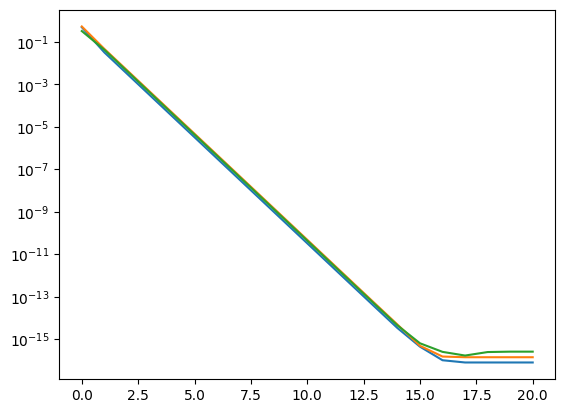

In [32]:
for i in range(3):
    pi_0 = np.random.uniform(low = 0, high = 1, size = 3)
    pi_0 /= np.sum(pi_0)
    print(pi_0)
    res = [pi_0]
    diff = [np.sqrt(np.sum((pi_0 - pi_infinity)**2))]
    for i in range(20):
        res.append(np.dot(res[-1], transition))
        diff.append(np.sqrt(np.sum((res[-1] - pi_infinity)**2)))
    plt.plot(diff)
plt.yscale('log')
print(np.array(res))
print(diff)

3. Absorbing state

a)

$$P_{\text{new}} = \begin{bmatrix}
0.2 & 0.7 & 0.1 \\
0.2 & 0.5 & 0.3 \\
0.0 & 0.0 & 1.0
\end{bmatrix}$$

Mean of starting from X1:  4.627440999537251


Text(0.5, 1.0, 'Start from X1')

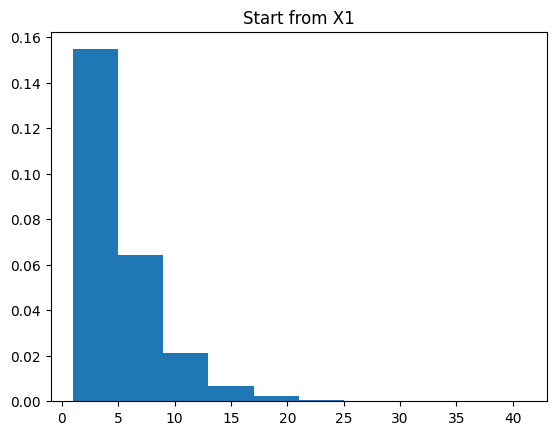

In [62]:
transition_new = np.array([[0.2, 0.7, 0.1], [0.2, 0.5, 0.3], [0.0, 0.0, 1.0]])


def simulation(initial_state, num):
    count = []
    for i in range(num):
        if i == 0:
            res = []
        if len(res) == 0:
            res.append(initial_state)

        res.append(np.random.choice([1, 2, 3], p = transition_new[res[-1] - 1]))
        if res[-1] == 3:
            count.append(len(res) - 1)
            res = []
    return count

count = simulation(1, 100000)
_ = plt.hist(count, density = True)
print('Mean of starting from X1: ', np.mean(count))
plt.title('Start from X1')

Mean of starting from X2:  3.7861199454793275


Text(0.5, 1.0, 'Start from X2')

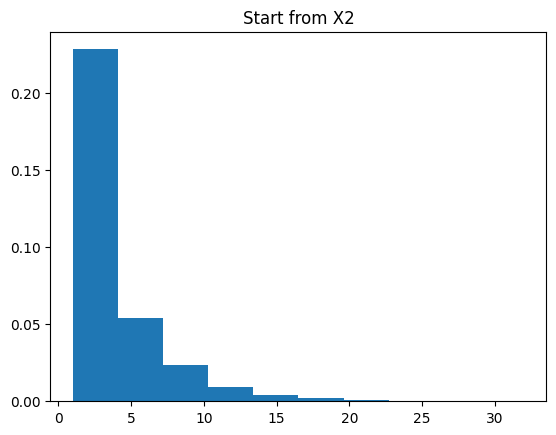

In [61]:
count = simulation(2, 100000)
_ = plt.hist(count, density = True)
print('Mean of starting from X2: ', np.mean(count))
plt.title('Start from X2')

b)

In [69]:
from sympy import symbols
from sympy.solvers.solveset import linsolve

x1, x2 = symbols('x1, x2')
res = linsolve([1 + 0.2 * x1 + 0.7 * x2 - x1, 1 + 0.2 * x1 + 0.5 * x2 - x2], (x1, x2))
print(res)

{(4.61538461538462, 3.84615384615385)}
